# **Exploratory Data Analysis(EDA)**

In [43]:
#library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import time
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE

In [44]:
#Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [45]:
#Load Dataset
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/UAS Bengkod/ObesityDataSet.csv')

In [46]:
#Melihat 5 Baris Pertama Dataset
df.head()

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21,Female,1.62,64,no,no,2,3,no,no,2,yes,0,1,Sometimes,Public_Transportation,Normal_Weight
1,21,Female,1.52,56,Sometimes,no,3,3,yes,yes,3,yes,3,0,Sometimes,Public_Transportation,Normal_Weight
2,23,Male,1.8,77,Frequently,no,2,3,no,no,2,yes,2,1,Sometimes,Public_Transportation,Normal_Weight
3,27,Male,1.8,87,Frequently,no,3,3,no,no,2,no,2,0,Sometimes,Walking,Overweight_Level_I
4,22,Male,1.78,89.8,Sometimes,no,2,1,no,no,2,no,0,0,Sometimes,Public_Transportation,Overweight_Level_II


In [47]:
# Menampilkan jumlah baris dan kolom
print(f"Jumlah Baris: {df.shape[0]}")
print(f"Jumlah Kolom: {df.shape[1]}")

Jumlah Baris: 2111
Jumlah Kolom: 17


In [48]:
#Menampilkan Informasi Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Age                             2097 non-null   object
 1   Gender                          2102 non-null   object
 2   Height                          2099 non-null   object
 3   Weight                          2100 non-null   object
 4   CALC                            2106 non-null   object
 5   FAVC                            2100 non-null   object
 6   FCVC                            2103 non-null   object
 7   NCP                             2099 non-null   object
 8   SCC                             2101 non-null   object
 9   SMOKE                           2106 non-null   object
 10  CH2O                            2105 non-null   object
 11  family_history_with_overweight  2098 non-null   object
 12  FAF                             2103 non-null   

In [49]:
# Menampilkan deskripsi data (statistik deskriptif untuk kolom numerik
print(df.describe())

         Age Gender Height Weight       CALC  FAVC  FCVC   NCP   SCC SMOKE  \
count   2097   2102   2099   2100       2106  2100  2103  2099  2101  2106   
unique  1394      3   1562   1518          5     3   808   637     3     3   
top       18   Male    1.7     80  Sometimes   yes     3     3    no    no   
freq     124   1056     58     58       1386  1844   647  1183  1997  2054   

        CH2O family_history_with_overweight   FAF   TUE       CAEC  \
count   2105                           2098  2103  2102       2100   
unique  1263                              3  1186  1130          5   
top        2                            yes     0     0  Sometimes   
freq     441                           1705   404   552       1747   

                       MTRANS      NObeyesdad  
count                    2105            2111  
unique                      6               7  
top     Public_Transportation  Obesity_Type_I  
freq                     1572             351  


In [50]:
# Menampilkan tipe data setiap kolom
print(df.dtypes)

Age                               object
Gender                            object
Height                            object
Weight                            object
CALC                              object
FAVC                              object
FCVC                              object
NCP                               object
SCC                               object
SMOKE                             object
CH2O                              object
family_history_with_overweight    object
FAF                               object
TUE                               object
CAEC                              object
MTRANS                            object
NObeyesdad                        object
dtype: object


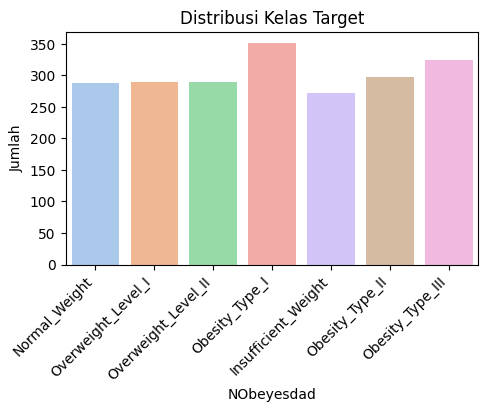

In [51]:
#Distribusi Kelas Target
plt.figure(figsize=(5, 4))
sns.countplot(data=df, x="NObeyesdad", hue="NObeyesdad", palette="pastel", legend=False)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.title("Distribusi Kelas Target")
plt.ylabel("Jumlah")
plt.show()

In [52]:
#Cek missing values
print("Missing Values:")
print(df.isnull().sum())

Missing Values:
Age                               14
Gender                             9
Height                            12
Weight                            11
CALC                               5
FAVC                              11
FCVC                               8
NCP                               12
SCC                               10
SMOKE                              5
CH2O                               6
family_history_with_overweight    13
FAF                                8
TUE                                9
CAEC                              11
MTRANS                             6
NObeyesdad                         0
dtype: int64


In [53]:
# Cek unique values pada kolom 'Age'
print("\nUnique Values pada kolom Age:")
print(df['Age'].nunique())
print(df['Age'].unique())


Unique Values pada kolom Age:
1394
['21' '23' '27' ... '22.524036' '24.361936' '23.664709']


In [54]:
#Cek Data Duplikat
print("\nJumlah data duplikat:")
print(df.duplicated().sum())


Jumlah data duplikat:
18


Gender
Male      1056
Female    1033
?           13
Name: count, dtype: int64


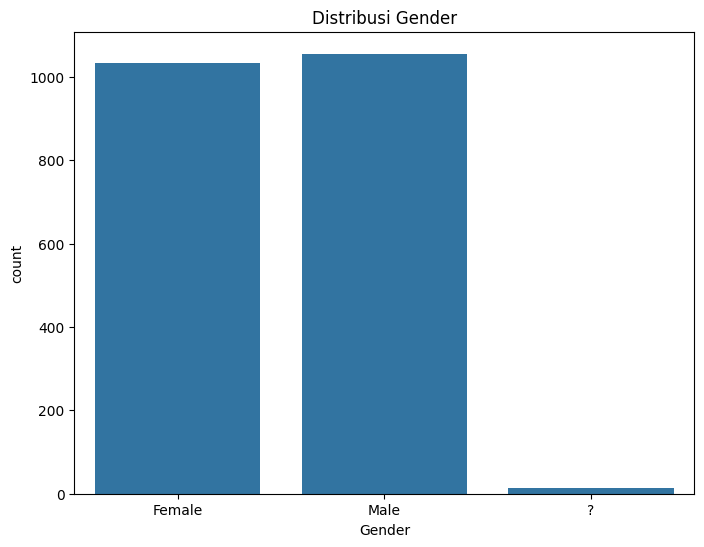

In [55]:
#Distribusi Gender
class_counts = df['Gender'].value_counts()
print(class_counts)
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Gender')
plt.title('Distribusi Gender')
plt.show()

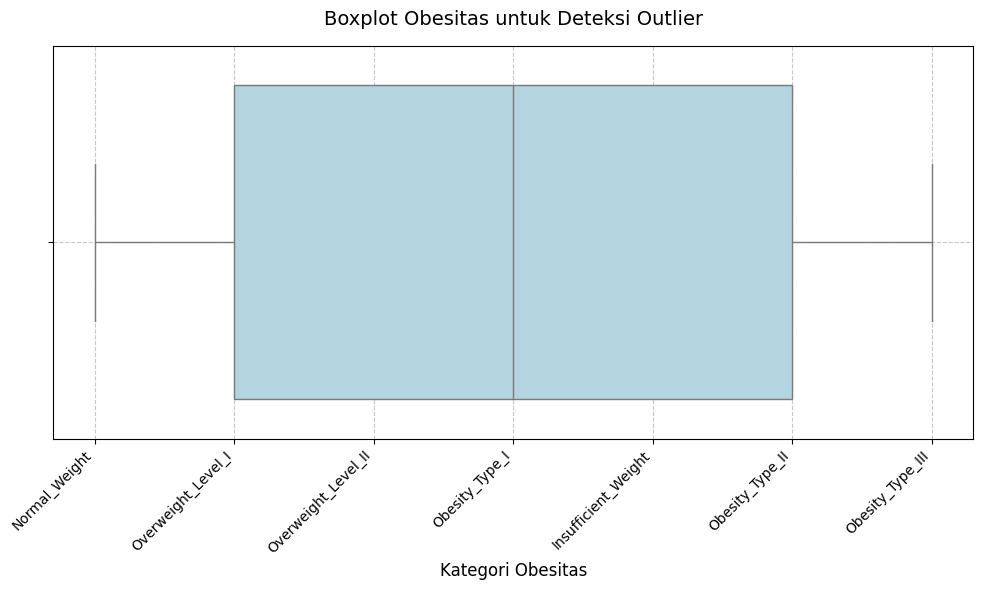

In [56]:
# Membuat boxplot untuk deteksi outlier
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['NObeyesdad'], color="lightblue")
plt.title('Boxplot Obesitas untuk Deteksi Outlier', fontsize=14, pad=15)
plt.xlabel('Kategori Obesitas', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Kesimpulan :

Masih terdapat banyak missing value pada masing-masing kolom. Tipe data kolom masih berupa object semua, perlu diubah ke numerik di tahap pre-processing nanti. Disteribusi Kelas Target juga masih imbalance dan OUtlier juga tidak menunjukkan distribusi yang  jelas, sehingga perlu dilakukan penanganan/handling di tahap pre-processing nanti.

## **TAHAP PRE PROCESSING**

In [57]:
#Tangani Missing Values
for column in df.columns:
    if df[column].isna().sum() > 0:  # Hanya untuk kolom yang punya missing values
        df[column] = df[column].fillna("Unknown")

print("Missing Values setelah penanganan:\n", df.isna().sum())

Missing Values setelah penanganan:
 Age                               0
Gender                            0
Height                            0
Weight                            0
CALC                              0
FAVC                              0
FCVC                              0
NCP                               0
SCC                               0
SMOKE                             0
CH2O                              0
family_history_with_overweight    0
FAF                               0
TUE                               0
CAEC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64


In [58]:
#Menangani Duplikasi Data
df = df.drop_duplicates()

In [59]:
#Ubah Data Kategorikal Menjadi Numerik

# Label Encoding untuk fitur biner
binary_cols = ['family_history_with_overweight', 'FAVC', 'SMOKE', 'SCC']
le = LabelEncoder()
for col in binary_cols:
    if col in df.columns:
        df[col] = le.fit_transform(df[col])
    else:
        print(f"Kolom {col} tidak ditemukan")

# One-Hot Encoding untuk fitur kategorikal nominal
nominal_cols = ['Gender', 'MTRANS']
missing_cols = [col for col in nominal_cols if col not in df.columns]
if missing_cols:
    print(f"Kolom yang hilang: {missing_cols}")
else:
    df = pd.get_dummies(df, columns=nominal_cols, drop_first=True)

# Label Encoding untuk fitur kategorikal ordinal
ordinal_cols = ['CAEC', 'CALC']
for col in ordinal_cols:
    if col in df.columns:
        df[col] = le.fit_transform(df[col])
    else:
        print(f"Kolom {col} tidak ditemukan")

# Label Encoding untuk target
if 'NObeyesdad' in df.columns:
    df['NObeyesdad'] = le.fit_transform(df['NObeyesdad'])
else:
    print("Kolom NObeyesdad tidak ditemukan")

# Tampilkan kolom setelah encoding
print(df.columns)



Index(['Age', 'Height', 'Weight', 'CALC', 'FAVC', 'FCVC', 'NCP', 'SCC',
       'SMOKE', 'CH2O', 'family_history_with_overweight', 'FAF', 'TUE', 'CAEC',
       'NObeyesdad', 'Gender_Female', 'Gender_Male', 'Gender_Unknown',
       'MTRANS_Automobile', 'MTRANS_Bike', 'MTRANS_Motorbike',
       'MTRANS_Public_Transportation', 'MTRANS_Unknown', 'MTRANS_Walking'],
      dtype='object')


<ipython-input-59-6a651b5cd682>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = le.fit_transform(df[col])
<ipython-input-59-6a651b5cd682>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = le.fit_transform(df[col])
<ipython-input-59-6a651b5cd682>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/

In [60]:
# Fungsi untuk menghapus outlier
def remove_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

# Daftar kolom kontinu
continuous_cols = ['Age', 'Height', 'Weight', 'NCP', 'CH2O', 'FAF']

# Konversi kolom ke tipe numerik
for col in continuous_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Hapus baris dengan NaN yang dihasilkan dari konversi
df = df.dropna(subset=continuous_cols)

# Terapkan fungsi remove_outliers untuk setiap kolom kontinu
for col in continuous_cols:
    df = remove_outliers(df, col)

# (Opsional) Tampilkan hasil
print(df.head())

    Age  Height  Weight  CALC  FAVC FCVC  NCP  SCC  SMOKE  CH2O  ...  \
0  21.0    1.62    64.0     5     2    2  3.0    2      2   2.0  ...   
1  21.0    1.52    56.0     3     2    3  3.0    3      3   3.0  ...   
2  23.0    1.80    77.0     2     2    2  3.0    2      2   2.0  ...   
3  27.0    1.80    87.0     2     2    3  3.0    2      2   2.0  ...   
5  29.0    1.62    53.0     3     3    2  3.0    2      2   2.0  ...   

   NObeyesdad  Gender_Female Gender_Male  Gender_Unknown  MTRANS_Automobile  \
0           1           True       False           False              False   
1           1           True       False           False              False   
2           1          False        True           False              False   
3           5          False        True           False              False   
5           1          False        True           False               True   

   MTRANS_Bike  MTRANS_Motorbike  MTRANS_Public_Transportation  \
0        False            

In [61]:
print(df.head())
print(df.dtypes)

    Age  Height  Weight  CALC  FAVC FCVC  NCP  SCC  SMOKE  CH2O  ...  \
0  21.0    1.62    64.0     5     2    2  3.0    2      2   2.0  ...   
1  21.0    1.52    56.0     3     2    3  3.0    3      3   3.0  ...   
2  23.0    1.80    77.0     2     2    2  3.0    2      2   2.0  ...   
3  27.0    1.80    87.0     2     2    3  3.0    2      2   2.0  ...   
5  29.0    1.62    53.0     3     3    2  3.0    2      2   2.0  ...   

   NObeyesdad  Gender_Female Gender_Male  Gender_Unknown  MTRANS_Automobile  \
0           1           True       False           False              False   
1           1           True       False           False              False   
2           1          False        True           False              False   
3           5          False        True           False              False   
5           1          False        True           False               True   

   MTRANS_Bike  MTRANS_Motorbike  MTRANS_Public_Transportation  \
0        False            

In [62]:
print(df['FCVC'].unique())
print(df['TUE'].unique())

#tipe datanya masih object

['2' '3' '1' 'Unknown' '?' '8.148992744163786' '8.42397392777979'
 '2.880161' '2.591439' '2.750715' '1.4925' '2.052932' '2.596364'
 '2.815157' '2.737762' '2.959658' '2.44004' '2.432302' '2.592247'
 '2.929889' '2.015258' '1.031149' '1.522001' '2.703436' '1.813234'
 '2.724285' '1.133844' '1.757466' '2.979383' '2.530066' '2.241606'
 '1.003566' '2.897899' '2.945967' '2.478891' '2.938031' '2.842102'
 '2.33998' '1.950742' '2.984425' '2.977018' '2.663421' '2.753752'
 '2.886157' '1.053534' '2.530233' '2.8813' '2.824559' '2.794197'
 '2.720701' '2.880792' '2.674431' '2.55996' '1.212908' '2.690754'
 '2.051283' '2.21498' '2.91548' '2.708965' '2.853513' '2.896562'
 '2.911877' '1.69427' '2.910345' '2.432886' '2.969205' '2.486189'
 '1.567101' '1.036414' '1.118436' '2.673638' '2.559571' '1.786841'
 '1.303878' '1.889883' '2.984004' '1.202075' '8.285111344444879'
 '1.206276' '2.052152' '2.555401' '2.108711' '1.570089' '2.714447'
 '2.903545' '2.39728' '2.823179' '2.838969' '2.568063' '2.652958'
 '2.30336

In [63]:
#Ubah ke Numerik
df['FCVC'] = pd.to_numeric(df['FCVC'], errors='coerce')
df['TUE'] = pd.to_numeric(df['TUE'], errors='coerce')

print(df['FCVC'].isna().sum())
print(df['TUE'].isna().sum())



12
9


In [64]:
#Mengisi Nilai Nan
df['FCVC'].fillna(df['FCVC'].mean(), inplace=True)
df['TUE'].fillna(df['TUE'].mean(), inplace=True)


<ipython-input-64-cda8cb286b13>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['FCVC'].fillna(df['FCVC'].mean(), inplace=True)
<ipython-input-64-cda8cb286b13>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try us

In [65]:
print(df.dtypes[['FCVC', 'TUE']])

#data siap digunakan

FCVC    float64
TUE     float64
dtype: object


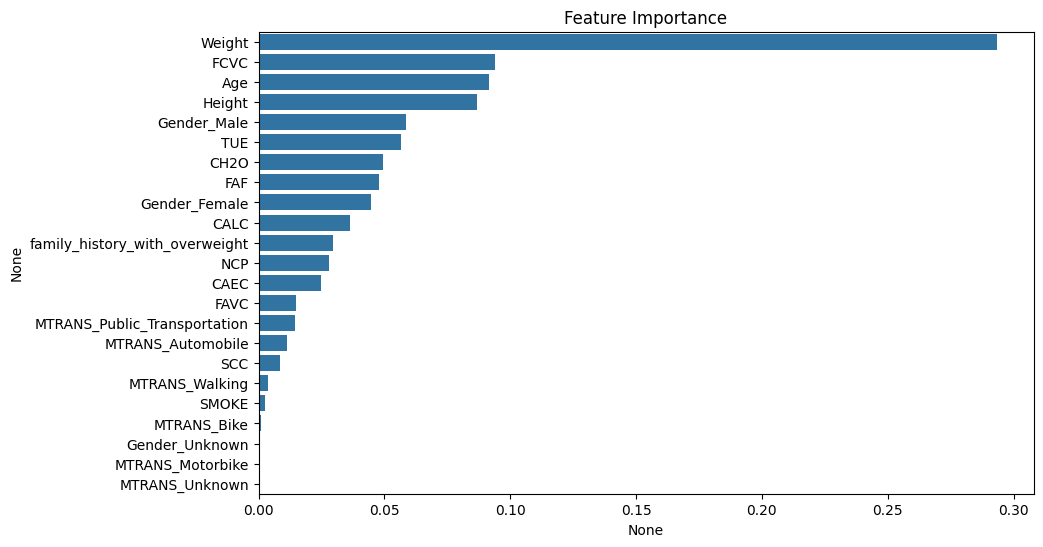

In [66]:
#Evaluasi Pentingnya Fitur
X = df.drop('NObeyesdad', axis=1)
y = df['NObeyesdad']

# Gunakan Random Forest untuk mengevaluasi pentingnya fitur
rf = RandomForestClassifier(random_state=42)
rf.fit(X, y)
feature_importance = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)

# Visualisasi pentingnya fitur
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance, y=feature_importance.index)
plt.title('Feature Importance')
plt.show()

In [67]:
#Menghapus fitur dengan importance rendah (< 0.01)
low_importance = feature_importance[feature_importance < 0.01].index
if len(low_importance) > 0:
    print(f"Fitur yang dihapus karena importance rendah: {low_importance}")
    X = X.drop(columns=low_importance)
    df = df.drop(columns=low_importance)

Fitur yang dihapus karena importance rendah: Index(['SCC', 'MTRANS_Walking', 'SMOKE', 'MTRANS_Bike', 'Gender_Unknown',
       'MTRANS_Motorbike', 'MTRANS_Unknown'],
      dtype='object')


In [68]:
# Tangani error (contoh: batasi nilai tidak realistis)

df = df[(df['Age'] >= 0) & (df['Age'] <= 100)]  # Usia realistis
df = df[(df['Height'] > 0) & (df['Height'] <= 2.5)]  # Tinggi dalam meter
df = df[(df['Weight'] > 0) & (df['Weight'] <= 300)]  # Berat dalam kg
df = df[(df['NCP'] >= 1) & (df['NCP'] <= 10)]  # Jumlah makan besar
df = df[(df['CH2O'] >= 0) & (df['CH2O'] <= 10)]  # Konsumsi air dalam liter
df = df[(df['FAF'] >= 0) & (df['FAF'] <= 7)]  # Aktivitas fisik (hari/minggu)

In [69]:
#Mengatasi Imbalance Data

print("Distribusi kelas sebelum SMOTE:\n", y.value_counts())

# Terapkan SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

print("Distribusi kelas setelah SMOTE:\n", pd.Series(y_resampled).value_counts())

Distribusi kelas sebelum SMOTE:
 NObeyesdad
4    289
3    192
2    182
1    181
6    149
5    139
0    126
Name: count, dtype: int64
Distribusi kelas setelah SMOTE:
 NObeyesdad
1    289
5    289
2    289
6    289
3    289
0    289
4    289
Name: count, dtype: int64


In [70]:
#Normalisasi Data

# Standarisasi fitur kontinu dan integer
scaler = StandardScaler()
scale_cols = continuous_cols + ['FCVC', 'TUE']
X_resampled[scale_cols] = scaler.fit_transform(X_resampled[scale_cols])

# Gabungkan kembali data
df_resampled = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), pd.Series(y_resampled, name='NObeyesdad')], axis=1)

In [71]:
# Kesimpulan Preprocessing
print("\nKesimpulan Preprocessing:")
print(f"- Missing values telah ditangani sebelumnya.")
print(f"- Duplikasi dihapus: {len(df) - len(df.drop_duplicates())} baris.")
print(f"- Outlier ditangani menggunakan IQR pada kolom: {continuous_cols}")
print(f"- Fitur kategorikal diencode: {binary_cols + nominal_cols + ordinal_cols}")
print(f"- Fitur dengan importance rendah (jika ada) dihapus: {low_importance if len(low_importance) > 0 else 'Tidak ada'}")
print(f"- Ketidakseimbangan kelas ditangani menggunakan SMOTE.")
print(f"- Fitur {scale_cols} telah distandarisasi menggunakan StandardScaler.")
print(f"- Data siap untuk pemodelan dengan {len(df_resampled)} baris dan {len(df_resampled.columns)} kolom.")


Kesimpulan Preprocessing:
- Missing values telah ditangani sebelumnya.
- Duplikasi dihapus: 0 baris.
- Outlier ditangani menggunakan IQR pada kolom: ['Age', 'Height', 'Weight', 'NCP', 'CH2O', 'FAF']
- Fitur kategorikal diencode: ['family_history_with_overweight', 'FAVC', 'SMOKE', 'SCC', 'Gender', 'MTRANS', 'CAEC', 'CALC']
- Fitur dengan importance rendah (jika ada) dihapus: Index(['SCC', 'MTRANS_Walking', 'SMOKE', 'MTRANS_Bike', 'Gender_Unknown',
       'MTRANS_Motorbike', 'MTRANS_Unknown'],
      dtype='object')
- Ketidakseimbangan kelas ditangani menggunakan SMOTE.
- Fitur ['Age', 'Height', 'Weight', 'NCP', 'CH2O', 'FAF', 'FCVC', 'TUE'] telah distandarisasi menggunakan StandardScaler.
- Data siap untuk pemodelan dengan 2023 baris dan 17 kolom.
